In [226]:
# linear regression using tensor flow 

In [227]:
import numpy as np 
import pandas as pd 

In [228]:
import matplotlib.pyplot as plt

In [229]:
df= pd.read_csv('Final_Model_data.csv',header=0,encoding = 'unicode_escape',index_col='rownum')

In [230]:
df.head()

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
1,30000000,862,Toy Story,21.946943,373554033,81,7.7,5415,7.684645,13,...,0,0,0,0,0,0,0,0,0,0
2,65000000,8844,Jumanji,17.015539,262797249,104,6.9,2413,6.876926,26,...,0,0,0,0,0,0,0,0,0,0
3,16000000,31357,Waiting to Exhale,3.859495,81452156,127,6.1,34,5.675590,10,...,0,0,0,0,0,0,0,0,0,0
4,0,11862,Father of the Bride Part II,8.387519,76578911,106,5.7,173,5.624595,12,...,0,0,0,0,0,0,0,0,0,0
5,60000000,949,Heat,17.924927,187436818,170,7.7,1886,7.656437,65,...,0,0,0,0,0,0,0,0,0,0


In [231]:
df.dtypes

budget                     int64
id                         int64
original_title            object
popularity               float64
revenue                    int64
runtime                    int64
vote_average             float64
vote_count                 int64
weighted_rating          float64
cast_size                  int64
crew_size                  int64
revenue_divide_budget    float64
movie_count                int64
director_Rank              int64
collection_Rank            int64
prod_Comp_Rank             int64
genres_Rank                int64
Genre_0                    int64
Genre_Action               int64
Genre_Adventure            int64
Genre_Animation            int64
Genre_Comedy               int64
Genre_Crime                int64
Genre_Documentary          int64
Genre_Drama                int64
Genre_Family               int64
Genre_Fantasy              int64
Genre_Foreign              int64
Genre_History              int64
Genre_Horror               int64
Genre_Musi

In [232]:
df.shape

(46623, 38)

In [233]:
#df.loc[df['revenue'] == 0.0]

In [234]:
df[df.revenue == 0.0]

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
6,58000000,11860,Sabrina,6.677277,0,127,6.2,141,6.014294,57,...,0,0,0,0,0,0,0,0,0,0
7,0,45325,Tom and Huck,2.561161,0,97,5.4,45,5.331446,7,...,0,0,0,0,0,0,0,0,0,0
11,0,12110,Dracula: Dead and Loving It,5.430331,0,88,5.7,210,5.635982,11,...,0,0,0,0,0,0,0,0,0,0
21,0,1710,Copycat,10.701801,0,124,6.5,199,6.316734,15,...,0,0,0,0,0,0,0,0,0,0
23,0,12665,Powder,12.133094,0,111,6.3,143,6.097279,5,...,0,0,0,0,0,0,0,0,0,0
25,0,16420,Othello,1.845899,0,123,7.0,33,6.119348,9,...,0,0,0,0,0,0,0,0,0,0
27,0,17015,Persuasion,2.228434,0,104,7.4,36,6.365010,26,...,0,0,0,0,0,0,0,0,0,0
29,0,37557,¾Ôà¥_¾Ôà_Î¾Ôàö¡_Ð© ¾Á´,1.100915,0,108,6.5,17,5.675302,6,...,0,0,0,0,0,0,0,0,0,0
32,0,78802,"Guillaumet, les ailes du courage",0.745542,0,50,6.8,4,5.438864,7,...,0,0,0,0,1,0,0,0,0,0


In [235]:
df[df.budget == 0.0]

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
4,0,11862,Father of the Bride Part II,8.387519,76578911,106,5.7,173,5.624595,12,...,0,0,0,0,0,0,0,0,0,0
7,0,45325,Tom and Huck,2.561161,0,97,5.4,45,5.331446,7,...,0,0,0,0,0,0,0,0,0,0
11,0,12110,Dracula: Dead and Loving It,5.430331,0,88,5.7,210,5.635982,11,...,0,0,0,0,0,0,0,0,0,0
12,0,21032,Balto,12.140733,11348324,78,7.1,423,6.961825,13,...,0,0,0,0,0,0,0,0,0,0
21,0,1710,Copycat,10.701801,0,124,6.5,199,6.316734,15,...,0,0,0,0,0,0,0,0,0,0
23,0,12665,Powder,12.133094,0,111,6.3,143,6.097279,5,...,0,0,0,0,0,0,0,0,0,0
25,0,16420,Othello,1.845899,0,123,7.0,33,6.119348,9,...,0,0,0,0,0,0,0,0,0,0
27,0,17015,Persuasion,2.228434,0,104,7.4,36,6.365010,26,...,0,0,0,0,0,0,0,0,0,0
29,0,37557,¾Ôà¥_¾Ôà_Î¾Ôàö¡_Ð© ¾Á´,1.100915,0,108,6.5,17,5.675302,6,...,0,0,0,0,0,0,0,0,0,0


In [236]:
indexNames = df[ (df['revenue'] == 0.0) | (df['budget'] == 0.0) ].index

In [237]:
#indexNames

In [238]:
df.drop(indexNames , inplace=True)

In [239]:
df.shape

(5458, 38)

In [240]:
df.head()

,budget,id,original_title,popularity,revenue,runtime,vote_average,vote_count,weighted_rating,cast_size,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western
rownum,,,,,,,,,,,,,,,,,,,,,
1,30000000,862,Toy Story,21.946943,373554033,81,7.7,5415,7.684645,13,...,0,0,0,0,0,0,0,0,0,0
2,65000000,8844,Jumanji,17.015539,262797249,104,6.9,2413,6.876926,26,...,0,0,0,0,0,0,0,0,0,0
3,16000000,31357,Waiting to Exhale,3.859495,81452156,127,6.1,34,5.675590,10,...,0,0,0,0,0,0,0,0,0,0
5,60000000,949,Heat,17.924927,187436818,170,7.7,1886,7.656437,65,...,0,0,0,0,0,0,0,0,0,0
8,35000000,9091,Sudden Death,5.231580,64350171,106,5.5,174,5.457491,6,...,0,0,0,0,0,0,0,0,0,0


In [241]:
df = df.drop(['id', 'original_title','revenue_divide_budget'], axis=1)

In [242]:
df.shape

(5458, 35)

In [243]:
# Put the target revenue in another DataFrame
target = pd.DataFrame(df.revenue, columns=["revenue"])

In [244]:
df = df.drop(['revenue'], axis=1)

In [245]:
X = df
y = target['revenue']

In [246]:
X.shape

(5458, 34)

In [247]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [248]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X

def append_bias_reshape(features,labels):
    m = features.shape[0]
    n = features.shape[1]
    x = np.reshape(np.c_[np.ones(m),features],[m,n + 1])
    y = np.reshape(labels,[m,1])
    return x, y

In [249]:
X=df[['vote_count','budget','weighted_rating','runtime','cast_size','director_Rank','crew_size','prod_Comp_Rank','vote_average']]

In [250]:
type(X)

pandas.core.frame.DataFrame

In [251]:
X.shape

(5458, 9)

In [252]:
type(y)

pandas.core.series.Series

In [253]:
y.shape

(5458,)

In [254]:
X.shape

(5458, 9)

In [255]:
# Import train_test_split function
from sklearn.model_selection import train_test_split


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [256]:
X_train.shape

(3820, 9)

In [257]:
#X_train, Y_train = np.array(boston.data), np.array(boston.target)
X_train = normalize(X_train)
X_train, y_train = append_bias_reshape(X_train, y_train)

/Users/APM/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [258]:
y_train.shape

(3820, 1)

In [259]:
X_train.shape

(3820, 10)

In [260]:
#Y_train = normalize(Y_train)
m = len(X_train)  #Number of training examples
n = 10   # Number of features

# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X', shape=[m,n])
Y = tf.placeholder(tf.float32, name='Y')

# Variables for coefficients
#b = tf.Variable(0.0)
w = tf.Variable(tf.random_normal([n,1]))

In [261]:
# The Linear Regression Model
Y_hat = tf.matmul(X, w) 

# Loss function
loss = tf.reduce_mean(tf.square(Y - Y_hat, name='loss'))

# Gradient Descent with learning rate of 0.05 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

# Initializing Variables
init_op = tf.global_variables_initializer()


In [262]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

In [263]:
total = []
# Computation Graph
with tf.Session() as sess:
    # Initialize variables
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs', sess.graph)

    # train the model for 100 epcohs
    for i in range(2000):
       _, l = sess.run([optimizer, loss], feed_dict={X: X_train, Y: y_train})
       total.append(l)
       if i%100 == 0:
        print('Epoch {0}: Loss {1}'.format(i, l))

    writer.close()

    Y_pred = sess.run(Y_hat,feed_dict = {X:X_train} )

    w_value = sess.run(w)
    
     # Save the variables to disk.
    save_path = saver.save(sess, "/Users/APM/MSDS_Northwestern/498_data/model.ckpt")
    print("Model saved in file: %s" % save_path)

Epoch 0: Loss 3.560192880934912e+16
Epoch 100: Loss 7804490837131264.0
Epoch 200: Loss 7795908955602944.0
Epoch 300: Loss 7794496448233472.0
Epoch 400: Loss 7794252171968512.0
Epoch 500: Loss 7794211906650112.0
Epoch 600: Loss 7794202242973696.0
Epoch 700: Loss 7794203853586432.0
Epoch 800: Loss 7794203853586432.0
Epoch 900: Loss 7794201169231872.0
Epoch 1000: Loss 7794202242973696.0
Epoch 1100: Loss 7794203316715520.0
Epoch 1200: Loss 7794202242973696.0
Epoch 1300: Loss 7794202242973696.0
Epoch 1400: Loss 7794202242973696.0
Epoch 1500: Loss 7794202242973696.0
Epoch 1600: Loss 7794202242973696.0
Epoch 1700: Loss 7794202242973696.0
Epoch 1800: Loss 7794202242973696.0
Epoch 1900: Loss 7794202242973696.0
Model saved in file: /Users/APM/MSDS_Northwestern/498_data/model.ckpt


Predicted revenue: $-568434.00  Actual revenue: $8220215 
Done


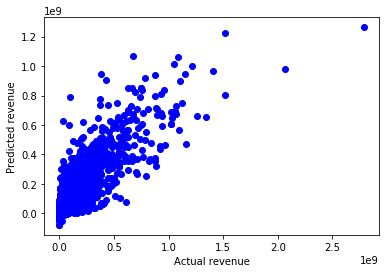

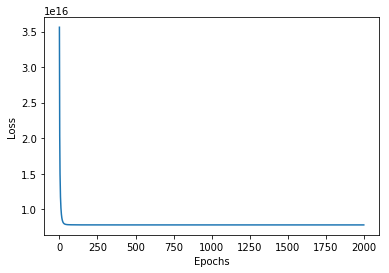

In [264]:
N= 500
X_new = X_train
#Y_pred =  np.matmul(X_new, w_value) # + b_value)
print('Predicted revenue: ${0:.2f}  Actual revenue: ${1}'.format(Y_pred[N][0], y_train[N][0]) , '\nDone')
# Plot the result
#print(Y_pred.shape, Y_train.shape)
plt.plot(y_train, Y_pred, 'bo')
plt.xlabel("Actual revenue")
plt.ylabel("Predicted revenue")
plt.show()
#
plt.plot(total)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [265]:
# The coefficients
w_value

array([[ 89474710.  ],
       [ 91993810.  ],
       [ 68884616.  ],
       [-13264767.  ],
       [   114944.36],
       [  1509616.2 ],
       [ -4071225.  ],
       [ -8041388.5 ],
       [ -2545219.5 ],
       [ 10900135.  ]], dtype=float32)

In [266]:
Y_pred.shape

(3820, 1)

In [267]:
w_value.shape

(10, 1)

In [268]:
from sklearn.metrics import mean_squared_error, r2_score

In [269]:
 # evaluating the model on train dataset
rmse_train = np.sqrt(mean_squared_error(y_train, Y_pred))
r2_train = r2_score(y_train, Y_pred)

In [270]:
print("The model performance for the train set")
print("-------------------------------------------")
print("RMSE of train set is {}".format(rmse_train))
print("R2 score of train set is {}".format(r2_train))

The model performance for the train set
-------------------------------------------
RMSE of train set is 88284779.44068463
R2 score of train set is 0.7175624641506717


In [271]:
Y_hat

<tf.Tensor 'MatMul_8:0' shape=(3820, 1) dtype=float32>

In [272]:
X_test.shape

(1638, 9)

In [273]:
#X_train, Y_train = np.array(boston.data), np.array(boston.target)
X_test = normalize(X_test)
X_test, y_test = append_bias_reshape(X_test, y_test)

/Users/APM/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [274]:
X_test.shape

(1638, 10)

In [275]:
#Y_train = normalize(Y_train)
m = len(X_test)  #Number of training examples
n = 10   # Number of features

# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X', shape=[m,n])
Y = tf.placeholder(tf.float32, name='Y')



In [276]:
# The Linear Regression Model
Y_hat = tf.matmul(X, w) 

# Loss function
loss = tf.reduce_mean(tf.square(Y - Y_hat, name='loss'))

# Gradient Descent with learning rate of 0.05 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.02).minimize(loss)

# Initializing Variables
init_op = tf.global_variables_initializer()

In [277]:
X_test.shape

(1638, 10)

In [278]:
# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
   # Restore variables from disk.
   saver.restore(sess, "/Users/APM/MSDS_Northwestern/498_data/model.ckpt")
   print("Model restored.")
   graph = tf.get_default_graph()
   #Now, access the op that you want to run. 
   #op_to_restore = graph.get_tensor_by_name("op_to_restore:0")
   # Check the values of the variables
   Y_pred2 = sess.run(Y_hat,feed_dict = {X:X_test} )
   w_value2 = sess.run(w)
     
   #print("v1 : %s" % v1.eval())
   #print("v2 : %s" % v2.eval())

INFO:tensorflow:Restoring parameters from /Users/APM/MSDS_Northwestern/498_data/model.ckpt
Model restored.


In [279]:
Y_pred2

array([[-7.4340295e+06],
       [ 1.5207584e+08],
       [-6.8188160e+06],
       ...,
       [ 5.4355176e+07],
       [ 1.2378593e+08],
       [ 3.0003094e+08]], dtype=float32)

In [280]:
w_value2

array([[ 89474710.  ],
       [ 91993810.  ],
       [ 68884616.  ],
       [-13264767.  ],
       [   114944.36],
       [  1509616.2 ],
       [ -4071225.  ],
       [ -8041388.5 ],
       [ -2545219.5 ],
       [ 10900135.  ]], dtype=float32)

Predicted revenue: $61273164.00  Actual revenue: $64822796 
Done


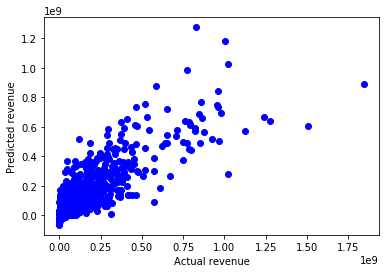

In [284]:
N= 500
X_new = X_test
#Y_pred =  np.matmul(X_new, w_value) # + b_value)
print('Predicted revenue: ${0:.2f}  Actual revenue: ${1}'.format(Y_pred2[N][0], y_test[N][0]) , '\nDone')
# Plot the result
#print(Y_pred.shape, Y_train.shape)
plt.plot(y_test, Y_pred2, 'bo')
plt.xlabel("Actual revenue")
plt.ylabel("Predicted revenue")
plt.show()


In [285]:
 # evaluating the model on train dataset
rmse_test = np.sqrt(mean_squared_error(y_test, Y_pred2))
r2_test = r2_score(y_test, Y_pred2)

In [286]:
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the test set
-------------------------------------------
RMSE of test set is 88458828.14987096
R2 score of test set is 0.7123609640500842
